In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp

In [25]:
df = pd.read_csv('./data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# Data Info

In [4]:
# Check for missing values
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [7]:
df.shape

(918, 12)

# Exploratory Data Analysis

🔣 Categorical Features: Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope, HeartDisease
🔢 Numerical Features: Age, RestingBP, Cholesterol, MaxHR, Oldpeak


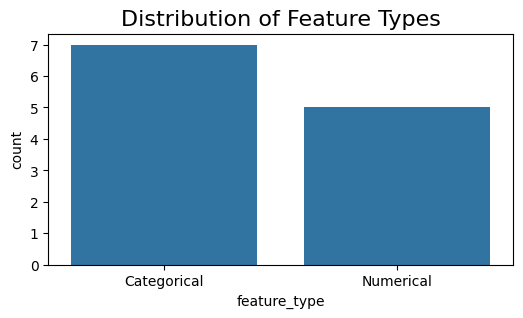

In [8]:
import pandas as pd
from termcolor import colored

# Assuming 'df' is your DataFrame
col = list(df.columns)
categorical_features, numerical_features = [], []

for feature in col:
    (
        numerical_features if len(df[feature].unique()) > 6 else categorical_features
    ).append(feature)

print(
    colored("🔣 Categorical Features:", "magenta", attrs=["bold"]),
    colored(", ".join(categorical_features), "cyan"),
)
print(
    colored("🔢 Numerical Features:", "green", attrs=["bold"]),
    colored(", ".join(numerical_features), "yellow"),
)

# Bonus: Visualize feature distribution
plt.figure(figsize=(6, 3))
sns.countplot(
    x="feature_type",
    data=pd.DataFrame(
        {
            "feature_type": ["Categorical"] * len(categorical_features)
            + ["Numerical"] * len(numerical_features)
        }
    ),
)
plt.title("Distribution of Feature Types", fontsize=16)
plt.show()

In [9]:
# Label Encodings : Df_transformed is for correlation and other operations where numeric features are supported

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_transformed = df.copy(deep = True)

df_transformed['Sex'] = le.fit_transform(df_transformed['Sex'])
df_transformed['ChestPainType'] = le.fit_transform(df_transformed['ChestPainType'])
df_transformed['RestingECG'] = le.fit_transform(df_transformed['RestingECG'])
df_transformed['ExerciseAngina'] = le.fit_transform(df_transformed['ExerciseAngina'])
df_transformed['ST_Slope'] = le.fit_transform(df_transformed['ST_Slope'])
df_transformed

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [10]:
import plotly.express as px
import plotly.graph_objects as go


# Assuming you have a dataframe named 'df_transformed'
corr = df_transformed.corr()

# Create a custom diverging colormap
colorscale = [
    [0.0, "rgb(59,76,192)"],
    [0.25, "rgb(140,210,225)"],
    [0.5, "rgb(255,255,255)"],
    [0.75, "rgb(253,183,94)"],
    [1.0, "rgb(180,4,38)"],
]

# Reverse the order of y-axis to flip the diagonal
heatmap = go.Heatmap(
    z=corr.values[::-1],
    x=corr.columns,
    y=corr.columns[::-1],
    colorscale=colorscale,
    zmin=-1,
    zmax=1,
    colorbar=dict(title="Correlation", thickness=20, ticklen=4, len=0.8),
    text=corr.values[::-1],
    texttemplate="%{text:.2f}",
    textfont={"size": 10},
    showscale=True,
)

# Create the layout
layout = go.Layout(
    title={
        "text": "Correlation Matrix",
        "y": 0.9,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
        "font": {"size": 24, "family": "Arial", "color": "black"},
    },
    xaxis=dict(tickangle=45, tickfont=dict(size=12)),
    yaxis=dict(tickfont=dict(size=12)),
    width=800,
    height=800,
    autosize=False,
    margin=dict(l=80, r=80, t=100, b=80),
)

# Create the figure
fig = go.Figure(data=[heatmap], layout=layout)

# Show the figure
fig.show()

In [11]:
# Create the histogram
fig = px.histogram(
    df,
    x="HeartDisease",
    color="Sex",
    hover_data=df.columns,
    title="Distribution of Heart Diseases by Sex",
    barmode="group",
    category_orders={"Sex": ["Male", "Female"]},  # Ensure consistent ordering
    color_discrete_sequence=px.colors.carto.Bluyl,  # Use a more appealing color palette
)

# Update layout for better aesthetics
fig.update_layout(
    title={
        "text": "Distribution of Heart Diseases by Sex",
        "y": 0.9,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
        "font": {"size": 24, "family": "Arial", "color": "black"},
    },
    xaxis_title="Heart Disease",
    yaxis_title="Count",
    legend_title="Sex",
    font=dict(size=14, family="Arial"),
    bargap=0.5,  # Adjust gap between bars
    template="plotly_white",  # Use a clean white background
    height=600,
    width=800,
)

# Update axes for better readability
fig.update_xaxes(tickangle=0, tickfont=dict(size=12), title_font=dict(size=18))
fig.update_yaxes(tickfont=dict(size=12), title_font=dict(size=18))

# Show the updated figure
fig.show()

In [12]:
# Create the histogram
fig = px.histogram(
    df,
    x="ChestPainType",
    color="Sex",
    hover_data=df.columns,
    title="Types of Chest Pain by Sex",
    barmode="group",
    category_orders={"ChestPainType": ["TA", "ATA", "NAP", "ASY"]},
    color_discrete_sequence=px.colors.colorbrewer.Set3,
)

# Update layout for better aesthetics
fig.update_layout(
    title={
        "text": "Types of Chest Pain by Sex",
        "y": 0.9,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
        "font": {"size": 24, "family": "Arial", "color": "black"},
    },
    xaxis_title="Chest Pain Type",
    yaxis_title="Count",
    legend_title="Sex",
    font=dict(size=14, family="Arial"),
    bargap=0.3,
    template="plotly_white",
    width=800,
    height=600,
)

# Update axes for better readability
fig.update_xaxes(tickangle=45, tickfont=dict(size=12), title_font=dict(size=18))
fig.update_yaxes(tickfont=dict(size=12), title_font=dict(size=18))

# Add annotations for better insight
annotations = [
    dict(
        x=xi,
        y=yi,
        text=f"{yi}",
        xanchor="center",
        yanchor="bottom",
        showarrow=False,
        font=dict(size=12),
    )
    for xi, yi in zip(df["ChestPainType"], df["Sex"].value_counts().values)
]

fig.update_layout(annotations=annotations)

# Show the updated figure
fig.show()

[]

<Figure size 1500x1000 with 0 Axes>

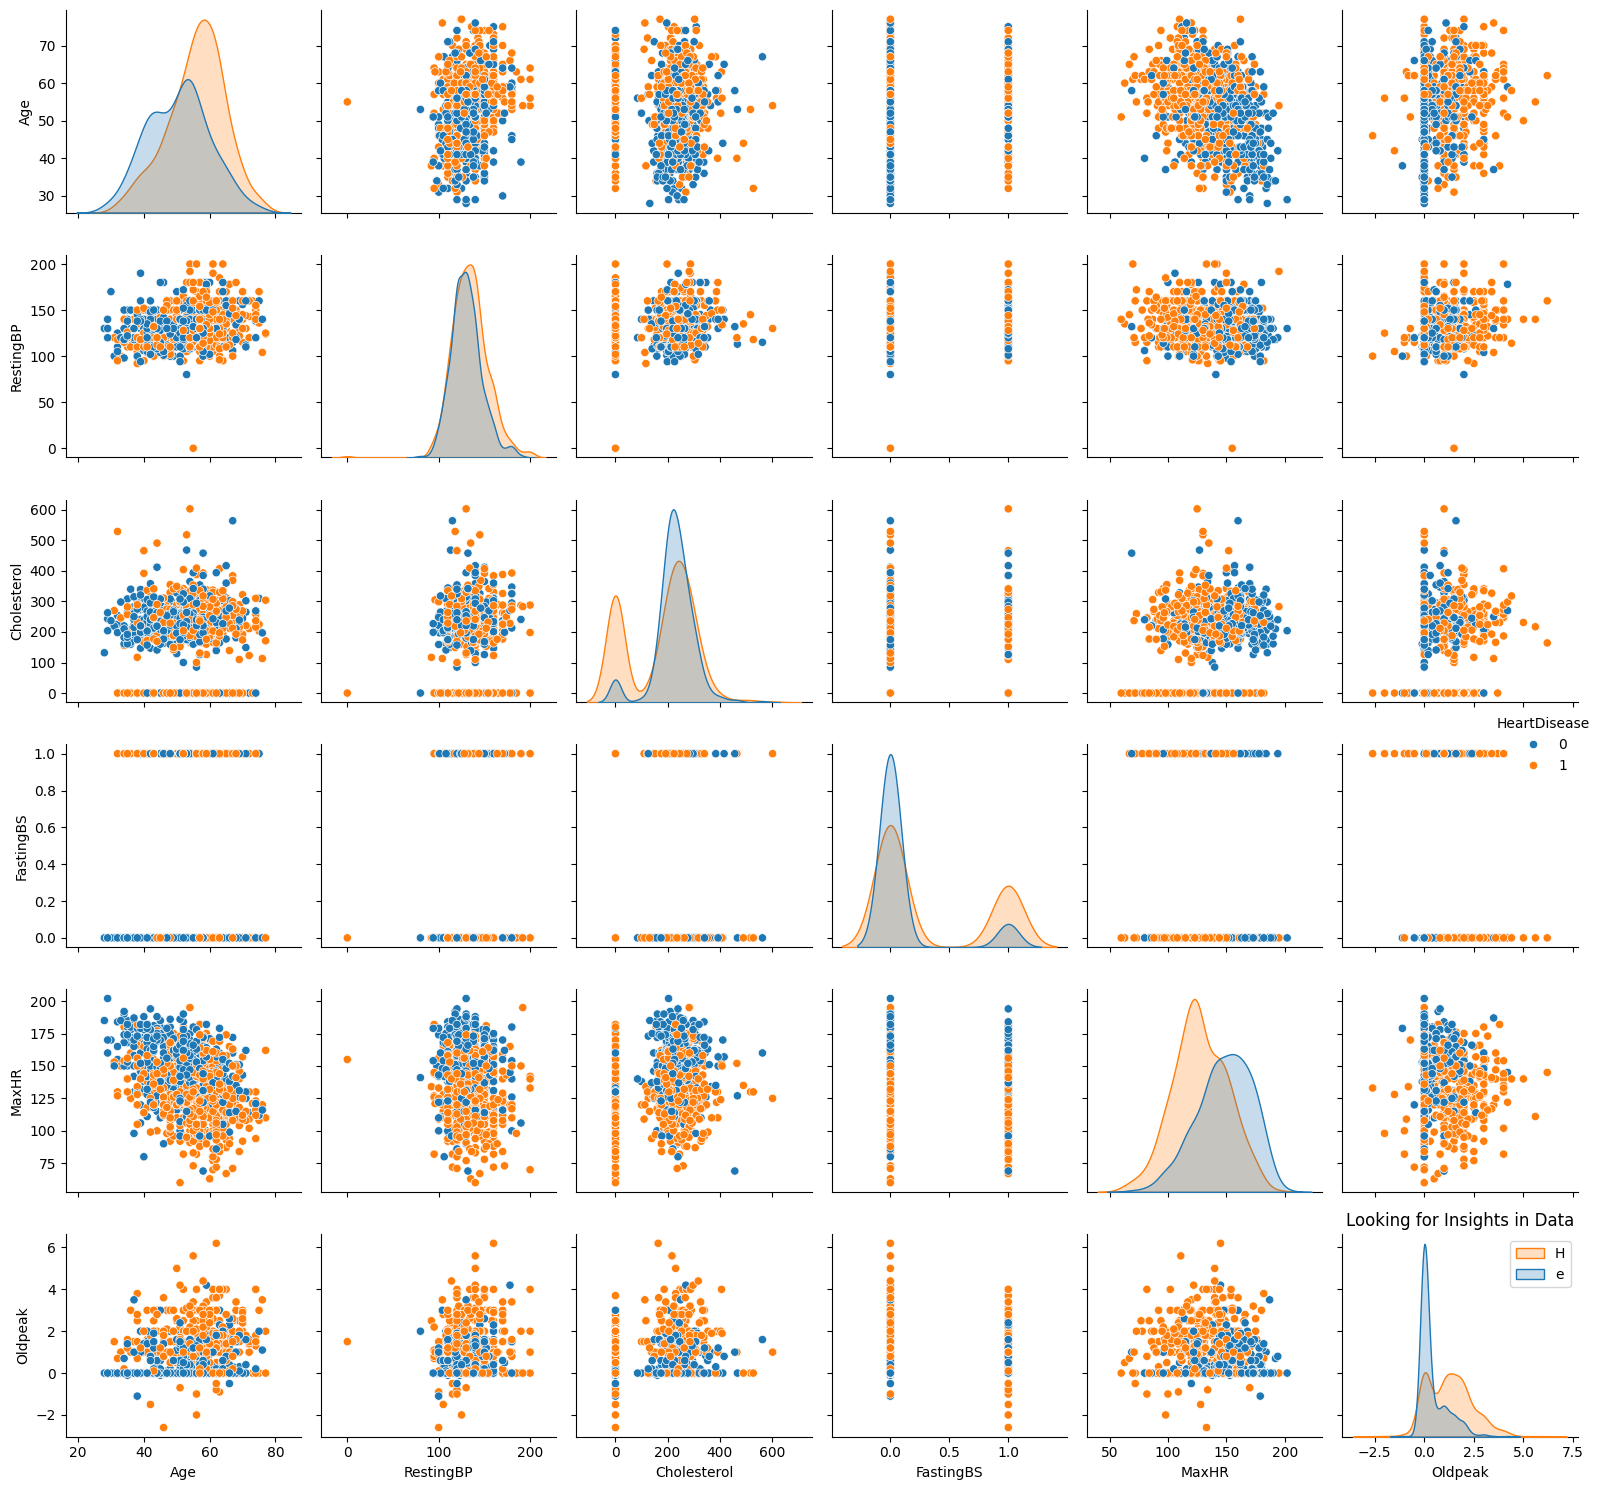

In [13]:
# pairplot

plt.figure(figsize=(15, 10))
sns.pairplot(df, hue="HeartDisease")
plt.title("Looking for Insights in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

In [14]:
from plotly.subplots import make_subplots

# Create subplots with shared y-axis
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=("Heart Disease", "No Heart Disease"),
    shared_yaxes=True,
)

# Define colors for each histogram
colors = [
    "rgba(31, 119, 180, 0.7)",
    "rgba(255, 127, 14, 0.7)",
    "rgba(44, 160, 44, 0.7)",
]

# Get maximum count for consistent binning
max_count = max(df["ChestPainType"].value_counts())

# Loop through each category and create histograms
for i, hd_status in enumerate([1, 0]):
    df_subset = df[df["HeartDisease"] == hd_status]

    # Create histogram trace
    hist_trace = go.Histogram(
        x=df_subset["ChestPainType"],
        name="Chest Pain Type",
        marker_color=colors[1],
        nbinsx=max_count,
    )

    # Add histogram trace to subplot
    fig.add_trace(hist_trace, row=1, col=i + 1)

# Update layout
fig.update_layout(
    title_text="Distributions Chest Pain Type by Heart Disease Status",
    title_font_size=24,
    title_font_family="Arial",
    title_x=0.5,
    title_y=0.95,
    height=600,
    width=1000,
    showlegend=False,
    bargap=0.2,
    bargroupgap=0.2,
    template="plotly_white",
)

# Update axes labels
fig.update_xaxes(title_text="Chest Pain Type", row=1, col=1)
fig.update_xaxes(title_text="Chest Pain Type", row=1, col=2)
fig.update_yaxes(
    title_text="Count", row=1, col=1
)  # Update y-axis label to Count for histograms

# Show the plot
fig.show()

In [15]:
# Create subplots with shared y-axis
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=("Heart Disease", "No Heart Disease"),
    shared_yaxes=True,
)

# Define colors for each histogram
colors = [
    "rgba(31, 119, 180, 0.7)",
    "rgba(255, 127, 14, 0.7)",
    "rgba(44, 160, 44, 0.7)",
]

# Loop through each category and create histograms
for i, hd_status in enumerate([1, 0]):
    df_subset = df[df["HeartDisease"] == hd_status]

    fig.add_trace(
    go.Histogram(
        x=df_subset["ST_Slope"], name="Slope", marker_color=colors[2]
    ),
    row=1,
    col=i + 1,
    )

# Update layout
fig.update_layout(
    title_text="Distributions the slope of the peak exercise ST segment by Heart Disease Status",
    title_font_size=24,
    title_font_family="Arial",
    title_x=0.5,
    title_y=0.95,
    height=600,
    width=1000,
    showlegend=False,
    bargap=0.2,
    bargroupgap=0.3,
    template="plotly_white",
)

# Update axes labels
fig.update_xaxes(title_text="Value", row=1, col=1)
fig.update_xaxes(title_text="Value", row=1, col=2)
fig.update_yaxes(
    title_text="Count", row=1, col=1
)  # Update y-axis label to Count for histograms

# Show the plot
fig.show()

In [16]:
# Calculate the mean differences
means = df_transformed.groupby("HeartDisease").mean().T
diffs = means.diff(axis=1).iloc[:, -1].sort_values(ascending=False)

# Create the plotly figure
fig = px.bar(
    x=diffs.values,
    y=diffs.index,
    orientation="h",
    title="Differences in Mean Values of Features Between Heart Disease and Non-Heart Disease Groups",
    labels={"x": "Difference in Mean Value", "y": "Feature"},
    text=diffs.values.round(2),  # Add text annotations
    color=np.where(diffs.values >= 0, "positive", "negative"),
    color_discrete_map={"positive": "indianred", "negative": "lightseagreen"},
)

# Customize the layout with fixed size
fig.update_layout(
    width=1000,
    height=600,
    xaxis=dict(
        tickmode="array",
    ),
    plot_bgcolor="white",
    yaxis_title_font=dict(size=16),
    xaxis_title_font=dict(size=16),
    title_font=dict(size=20),
    bargap=0.1,
    showlegend=False,
)

# Show the plot
fig.show()

In [17]:
df_norm = df_transformed.copy()
for column in df_norm.columns:
    if column != "HeartDisease":
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (
            df_norm[column].max() - df_norm[column].min()
        )

# Create the parallel coordinates plot
fig = go.Figure(
    data=go.Parcoords(
        line=dict(
            color=df_transformed["HeartDisease"], colorscale=[[0, "blue"], [1, "red"]]
        ),
        dimensions=[
            dict(range=[0, 1], label=column, values=df_norm[column])
            for column in df_norm.columns
            if column != "HeartDisease"
        ],
    )
)

# Update the layout
fig.update_layout(
    title={
        "text": "Parallel Coordinates Plot of Heart Disease Data",
        "y": 0.95,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
        "font": dict(size=20),
    },
    plot_bgcolor="white",
    paper_bgcolor="white",
    height=600,
)

# Show the plot
fig.show()

Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

In [18]:
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde

# Create a subplot with a specified number of rows and columns
num_cols = len(df.columns)
num_rows = int(np.ceil(num_cols / 3))
fig = sp.make_subplots(
    rows=num_rows,
    cols=3,
    subplot_titles=[f"Distribution of {col}" for col in df.columns],
)

# Define a color palette
colors = px.colors.qualitative.Bold

# Loop through each column and create a histogram for each
for i, col in enumerate(df.columns):
    row = i // 3 + 1
    col_num = i % 3 + 1

    # Create histogram trace
    hist_trace = go.Histogram(
        x=df[col],
        nbinsx=30,
        name=col,
        marker_color=colors[i % len(colors)],
        opacity=0.7,
        hoverinfo="x+y",
        showlegend=False,
    )
    fig.add_trace(hist_trace, row=row, col=col_num)

    # Create KDE trace
    if df[col].dtype in ["int64", "float64"]:  # Only create KDE for numeric columns
        kde = gaussian_kde(df[col].dropna())
        x_range = np.linspace(df[col].min(), df[col].max(), 100)
        y_kde = kde(x_range)
        kde_trace = go.Scatter(
            x=x_range,
            y=y_kde,
            mode="lines",
            name=f"{col} KDE",
            line=dict(color="black", width=2),
            showlegend=False,
        )
        fig.add_trace(kde_trace, row=row, col=col_num)

# Update layout for better spacing and aesthetics
fig.update_layout(
    height=300 * num_rows,
    width=1200,
    title_text="Distribution of Data Columns",
    title_font=dict(size=24, family="Arial", color="darkblue"),
    showlegend=False,
    template="plotly_white",
    margin=dict(l=40, r=40, t=80, b=40),
)

# Update x-axis and y-axis labels for readability
fig.update_xaxes(
    title_font=dict(size=12, family="Arial", color="darkblue"),
    tickfont=dict(size=10, family="Arial", color="black"),
    showgrid=True,
    gridwidth=1,
    gridcolor="lightgray",
)
fig.update_yaxes(
    title_font=dict(size=12, family="Arial", color="darkblue"),
    tickfont=dict(size=10, family="Arial", color="black"),
    showgrid=True,
    gridwidth=1,
    gridcolor="lightgray",
)

# Update traces to make bars thinner
fig.update_traces(marker_line_width=1, selector=dict(type="histogram"))

fig.show()

Detecting Outliers

In [20]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Number of rows and columns for subplots
num_columns = df.shape[1]
num_rows = (num_columns - 1) // 3 + 1

# Create a subplot with the appropriate number of rows and columns
fig = make_subplots(
    rows=num_rows,
    cols=3,
    subplot_titles=[f"Distribution of {col}" for col in df.columns],
)

# Define a color palette
colors = px.colors.qualitative.Safe

# Loop through each column and create a box plot with violin plot for each
for i, col in enumerate(df.columns):
    row = i // 3 + 1
    col_num = i % 3 + 1

    # Create violin plot
    violin = go.Violin(
        y=df[col],
        name=col,
        box_visible=True,
        line_color=colors[i % len(colors)],
        fillcolor=colors[i % len(colors)],
        opacity=0.6,
        meanline_visible=True,
        showlegend=False,
    )

    # Add jittered points
    jitter = go.Box(
        y=df[col],
        name=col,
        boxpoints="all",
        jitter=0.3,
        pointpos=-1.8,
        marker_color="rgba(0,0,0,0.3)",
        marker_size=2,
        line_width=0,
        showlegend=False,
    )

    fig.add_trace(violin, row=row, col=col_num)
    fig.add_trace(jitter, row=row, col=col_num)

# Update layout for better spacing and aesthetics
fig.update_layout(
    height=num_rows * 400,
    width=1500,
    title_text="Distribution of Data Columns",
    title_font=dict(size=24, family="Arial", color="darkblue"),
    showlegend=False,
    template="plotly_white",
    margin=dict(l=40, r=40, t=80, b=40),
)

# Update y-axis labels for readability
fig.update_yaxes(
    title_font=dict(size=12, family="Arial", color="darkblue"),
    tickfont=dict(size=10, family="Arial", color="black"),
    gridcolor="lightgray",
)

# Update x-axis for better appearance
fig.update_xaxes(showticklabels=False, gridcolor="lightgray")

fig.show()

# Data Preperation

In [21]:
X = df_transformed.iloc[:,:-1].values
y=df_transformed.iloc[:,-1].values
# y = y.astype(bool)
# X = X.astype(int)
X

array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       ...,
       [57. ,  1. ,  0. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  2. , ...,  0. ,  0. ,  2. ]])

In [22]:
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MaxAbsScaler,RobustScaler
sc_X = StandardScaler()
X  = sc_X.fit_transform(X)
X

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

# Assuming you have a DataFrame 'df'
df_numeric = df_transformed.select_dtypes(include=['float64', 'int64'])  # Select numeric columns
last_col = df_numeric.iloc[:, -1]  # Store the last column

# Remove the last column from the numeric DataFrame
df_numeric = df_numeric.iloc[:, :-1]

# Create scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
maxabs_scaler = MaxAbsScaler()
robust_scaler = RobustScaler()

# Perform scaling on numeric columns (excluding the last column)
df_standard = pd.DataFrame(standard_scaler.fit_transform(df_numeric), columns=df_numeric.columns)
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_numeric), columns=df_numeric.columns)
df_maxabs = pd.DataFrame(maxabs_scaler.fit_transform(df_numeric), columns=df_numeric.columns)
df_robust = pd.DataFrame(robust_scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Append the original last column to the scaled DataFrames
df_standard = pd.concat([df_standard, last_col], axis=1)
df_minmax = pd.concat([df_minmax, last_col], axis=1)
df_maxabs = pd.concat([df_maxabs, last_col], axis=1)
df_robust = pd.concat([df_robust, last_col], axis=1)

# Combine scaled numeric columns with non-numeric columns (if any)
if df.shape[1] != df_numeric.shape[1] + 1:
    non_numeric_cols = [col for col in df.columns if col not in df_numeric.columns and col != last_col.name]
    df_standard = pd.concat([df_standard, df[non_numeric_cols]], axis=1)
    df_minmax = pd.concat([df_minmax, df[non_numeric_cols]], axis=1)
    df_maxabs = pd.concat([df_maxabs, df[non_numeric_cols]], axis=1)
    df_robust = pd.concat([df_robust, df[non_numeric_cols]], axis=1)

In [24]:
print("Standard Scaled Data")
df_standard.to_csv("Standard_Scaled_Heart.csv", index=False)
print("MinMax Scaled Data")
df_minmax.to_csv("MinMax_Scaled_Heart.csv", index=False)
print("MaxAbs Scaled Data")
df_maxabs.to_csv("MaxAbs_Scaled_Heart.csv", index=False)
print("Robust Scaled Data")
df_robust.to_csv("Robust_Scaled_Heart.csv", index=False)
print("Neumeric Transformed Data")
df_transformed.to_csv("Neumeric_Transformed_Heart.csv", index=False)

Standard Scaled Data
MinMax Scaled Data
MaxAbs Scaled Data
Robust Scaled Data
Neumeric Transformed Data
